# Cartopy

本文主要关注如何使用Cartopy来帮助gis数据分析的可视化。

可以关注下[SciTools](https://github.com/SciTools)。

"SciTools is a collaborative effort to produce powerful Python-based open-source tools for Earth scientists"

cartopy 正是该社区开发的一个matplotlib支持的绘图python库，是basemap在python3的延续，因此就像python绘图从matplotlib开始一样，python+gis绘图当从它开始。cartopy 官方文档在[这里](https://scitools.org.uk/cartopy/docs/latest/)，geopandas （更多内容可以参考[hydroGIS repo](https://github.com/OuyangWenyu/hydroGIS)的AutoGIS文件夹下的内容）和 cartopy 的联合使用可以参考：[Plotting with CartoPy and GeoPandas](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html)。本文记录内容主要参考了[Maps with Cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)和[Basics: Quick + Simple maps with cartopy](https://geohackweek.github.io/visualization/03-cartopy/)。

安装方法：

```Shell
conda install -c conda-forge cartopy
```

## Cartopy 基本概念

Cartopy 使用了基本的matplotlib库来提供地理空间的绘图功能。 有一系列稳定的工具集来定义投影，再投影数据等。能提供了简单的精确制图的方法来构建地图，并且能和geopandas很好的协作。

Projections：Cartopy 的一个核心用途是定义转换数据投影的功能。cartopy.crs 模块定义了一系列投影，这在定义图形的投影时是很有用的。

Features：Cartopy 也包含了处理像shpfile和geojson的地理空间数据文件的模块，有一系列很方便使用的dataloader来向地图上增加内容，比如海岸线，边界等。

下面看一个例子。先回顾下在matplotlib中，绘制一个plot的过程。

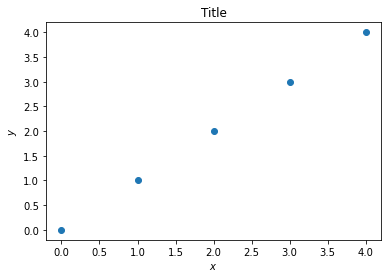

In [1]:
import matplotlib.pyplot as plt
import numpy as np
ax = plt.axes()           # create a set of axes
x = np.arange(5)
y = np.arange(5)
ax.scatter(x, y)   # plot some data on them
ax.set_title("Title")     # label it
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.show()

如上代码所示，首先定义坐标，然后是定义图形类型，最后设置图形细节。

空间数据比较特别，因为地图是有自己特定的坐标系的。因此，当我们使用cartopy 定义地图时，我们要指定坐标系，如下所示，在定义axes实例时，指定projection参数的值。

C:\Users\wenyu\miniconda3\envs\hydrus\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


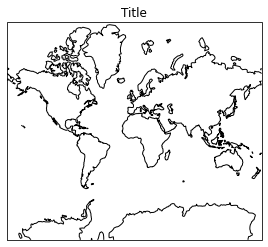

In [2]:
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("Title")                        # label it
plt.show()

注意前面提到的projection和features这里都有用到了。现在可以试试别的投影。

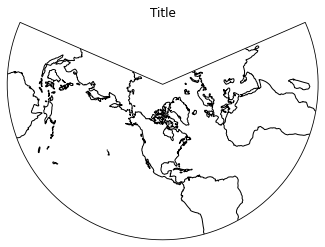

In [3]:
ax = plt.axes(projection = ccrs.LambertConformal())  
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Title")                        
plt.show()

更多关于cartopy中投影的信息可以参考：[Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)。

接下来再详细看看如何绘制地图。

## 绘制地图

cartopy 基于matplotlib，每个投影都知道如何取构建一个matplotlib axes实例来表示自己。投影构建的Axes是cartopy.mpl.geoaxes.GeoAxes的实例。该axes类继承自matplotlib，增加了一些绘制地图时有用的方法。

<GeoAxesSubplot:>

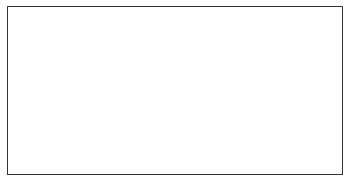

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

可以看到现在的axes是GeoAxesSubplot的实例。一个常用的feature就是coastlines：

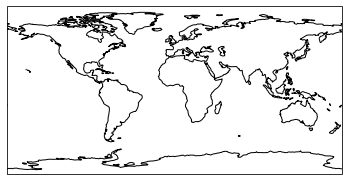

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt的subplot函数也可以使用：

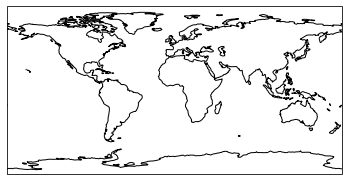

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

投影还有一些选项可以来定制：

In [7]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           c:\users\hust2\miniconda3\envs\hydrus\lib\site-packages\cartopy\crs.py
Type:           ABCMeta
Subclasses:     


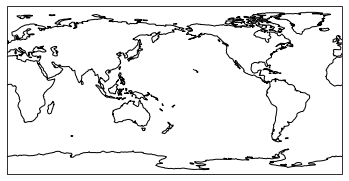

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

## GeoAxes的方法

详情可见[cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes)。

这里看看几个常用的方法。

set_extent 方法可以用来帮助创建一个区域性的地图。

In [9]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      c:\users\hust2\miniconda3\envs\hydrus\lib\site-packages\cartopy\mpl\geoaxes.py
Type:      method


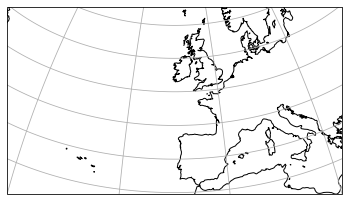

In [10]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

上面gridlines 函数是向地图上增加网格线。coastlines 是增加自然的地球海岸线。下面看看使用add_feature 向地图增加features。

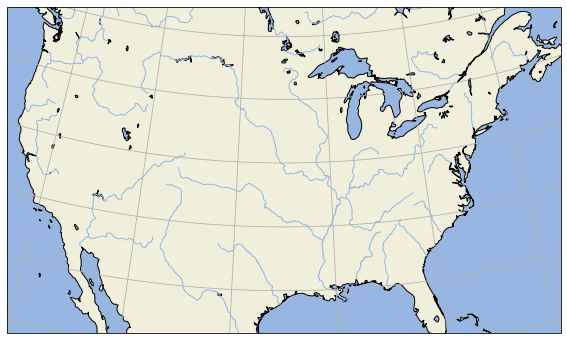

In [11]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

如果需要高分辨率的特征，Cartopy 可以从 Natural Earth Data 数据库和 GSHHS dataset 数据库自动下载并创建。

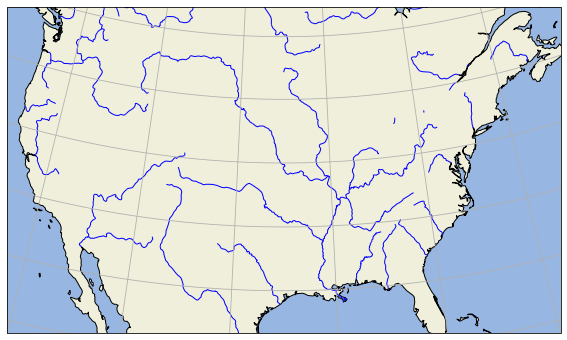

In [12]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

## 地图上添加数据

在实际科研工程工作中，最关键的还是要将自己的数据展示到地图上。因为地图是一个matplotlib axis，因此我们可以使用所有熟悉的matplotlib 命令来作图。默认的地图的范围会自动调整到能匹配数据的！

In [13]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

注意，数据要转换到匹配的投影空间上。这可以通过绘制方法中的transform参数来实现，参数数值是cartopy.crs的值。如果不指定transform，那么默认使用和geoaxis对象的投影一样的。

官方文档关于投影的说法：

“The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.”

也就是说，transform参数定义的是数据本身的投影类型。

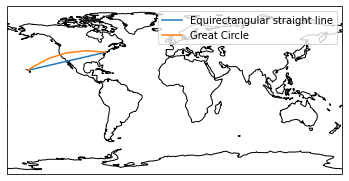

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

 栅格数据绘制也很方便。下面是一个栅格数据的原图

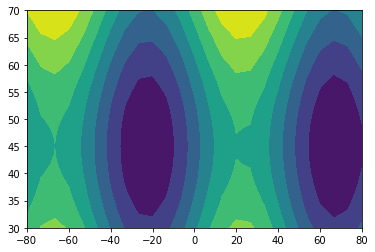

In [15]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

现在把它添加到地图上

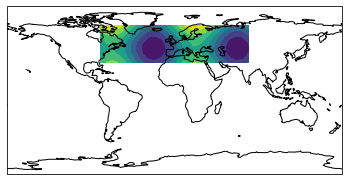

In [16]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

注意坐标，如果我们使用的是别的投影，又不指定，那么会变得奇怪

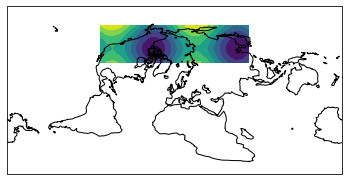

In [17]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

这时候需要在contourf函数中指定transform参数

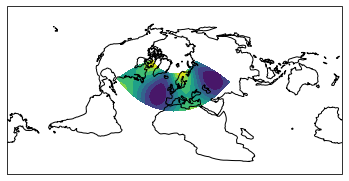

In [18]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

还可以在图中展示图片。

Text(-117, 33, 'San Diego')

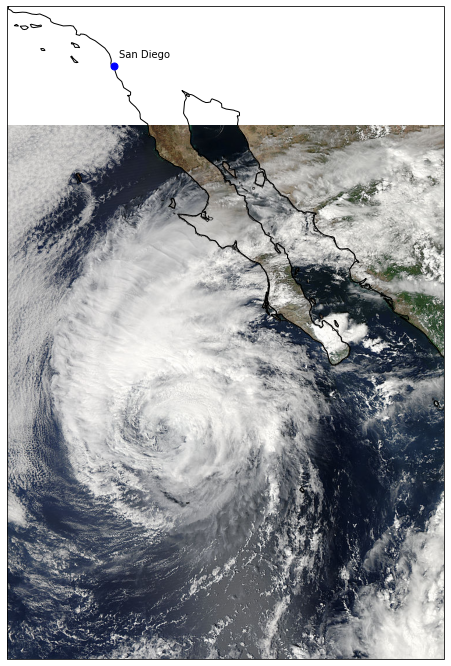

In [19]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

geopandas是PYTHON GIS处理中常用的基本库，它和cartopy可以很好的联合使用。

安装：


```Shell
conda install -c conda-forge geopandas
```

直接看实例，先获取geopandas数据。

<AxesSubplot:>

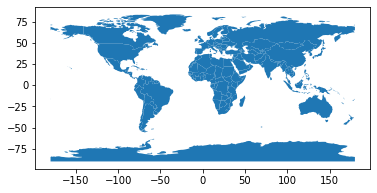

In [21]:
# sphinx_gallery_thumbnail_number = 7
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
df.plot()

Cartopy 使用的CRS系统和Shapely（geopandas中处理坐标系用到的库）有些不同，因此使用Cartopy绘图的第一步是需要把数据投影到新的坐标系。完成这一步，首先要定义一个CartoPy的CRS，然后使用Geopandas的to_crs函数将geopandas数据的坐标转换到Cartopy的坐标系下即可。

<AxesSubplot:>

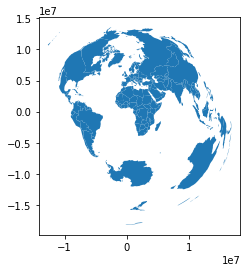

In [22]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

现在数据就在CartoPy的坐标系下了，那么就可以绘图了。

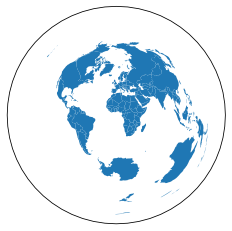

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

另外，可以使用EPSG码简单使用坐标系。

<GeoAxesSubplot:>

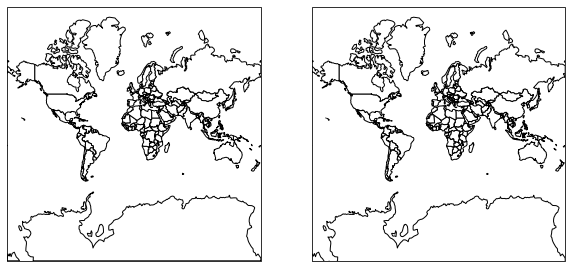

In [24]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

既然能从geopandas转到cartopy，也可以反过来转。先看一个cartopy：

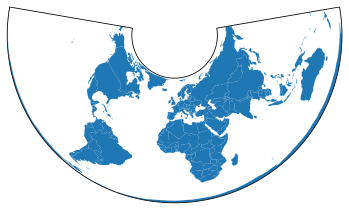

In [25]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

然后将数据转到geopandas的坐标系下：

<AxesSubplot:>

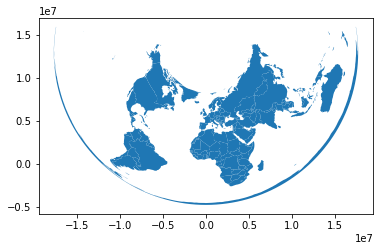

In [26]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

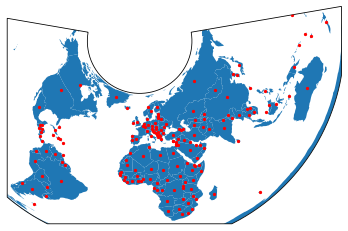

In [27]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
# Need to provide "zorder" to ensure the points are plotted above the polygons
df_aea_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)

plt.show()

此外，在地球科学中，[xarray](http://xarray.pydata.org/en/stable/#)是经常会用到的数据结构，而cartopy 可以和它很好的联合使用，比如读取netCDF数据并展示。以后用到了再详细补充。

## 一些例子

这部分根据日常所需积累一些实例。

### Colorbar

首先，是一个在地图上绘制点图，并给出定制的colorbar，参考资料有：[Can't plot the scatter plot using Cartopy which well shown in basemap](https://stackoverflow.com/questions/58318676/cant-plot-the-scatter-plot-using-cartopy-which-well-shown-in-basemap)

In [28]:
import numpy as np
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [29]:
xArrayTemp = data.flatten()
xArray = xArrayTemp[~np.isnan(xArrayTemp)]
temp = np.sort(xArray)
temp

array([0, 1, 2, 3, 4])

In [30]:
lat = [ 24, 30,40,50,50.5]
lon = [-120, -110,-100,-90, -70]
vmin = np.percentile(temp, 5)
vmax = np.percentile(temp, 95)
llcrnrlat = np.min(lat),
urcrnrlat = np.max(lat),
llcrnrlon = np.min(lon),
urcrnrlon = np.max(lon),
extent = [llcrnrlon[0], urcrnrlon[0], llcrnrlat[0], urcrnrlat[0]]
type(llcrnrlon[0])

numpy.int32

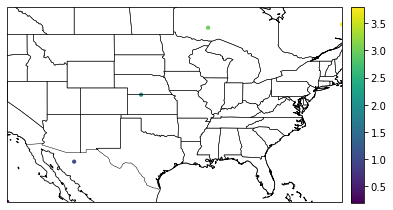

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
#Figure
fig=plt.figure()
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
states = NaturalEarthFeature(category="cultural", scale="50m", facecolor="none", name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)
# auto projection
pcm=ax.scatter(lon, lat, c=temp, s=10, cmap='viridis',vmin=vmin, vmax=vmax)
#colorbar
# fig.subplots_adjust(right=0.87)
# add_axes 后面参数数组四个值的含义是colorbar到最左边，最下边的距离以及colorbar自身的宽度和长度
cbar_ax = fig.add_axes([0.92, 0.16, 0.03, 0.68])
# extend='both' 可以将colorbar设置成带尖尖，表示有扩展的
cbar=fig.colorbar(pcm,cax=cbar_ax, orientation='vertical')
plt.show()

### 点击事件

接下来看看如何添加事件。因为事件在jupyter中不是太方便展示，所以这里直接给出代码在本文件夹中的文件里以供参考，代码的内容是“展示地图及上面的点，然后点击上面的点，返回对应点的序列数据”

### Cartopy中的多图绘制

接下来补充一个subplots中一个ax里绘制地图+colorbar的例子。在matplotlib中，绘制多图在一起的方式主要有三种，一是使用subplots先生成各个子图的axe对象，然后在各个axe上绘图，这是一种比较好的面向对象的绘图方式，代码会更易于理解；二是先给出figure，然后用subplot函数在各个模块上画图，这是面向过程式的方式；第三是使用GridSpec，先指定好框架，然后再绘图，这也是面向对象的方式。更多详细内容可以参考：https://github.com/OuyangWenyu/hydrus/blob/master/3-basic-pyviz/matplotlib/how-to-use-matplotlib.ipynb

结合cartopy使用时，第一种subplots的方式，会首先生成坐标轴，而坐标轴的投影是没法再逐一修改的，具体可以参考：[How do I change matplotlib's subplot projection of an existing axis?](https://stackoverflow.com/questions/33942233/how-do-i-change-matplotlibs-subplot-projection-of-an-existing-axis)

如果绘制的图形都有相同的投影，可以采用如下形式：

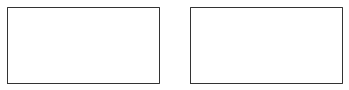

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a grid of plots
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

不过当有的子图不需要投影，或者投影不同时，这种方式就不太合适了，那么可以使用subplot函数，比如

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.PolarAxesSubplot'>
<class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


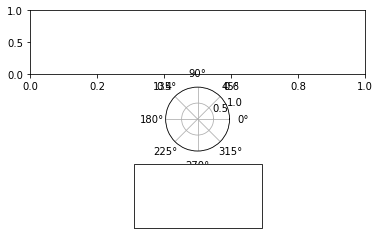

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax1 = plt.subplot(311)
ax2 = plt.subplot(312, projection='polar')
ax3 = plt.subplot(313, projection=ccrs.PlateCarree())

print(type(ax1))
print(type(ax2))
print(type(ax3))

下面看一个实例。先给出数据

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import numpy as np
from matplotlib import gridspec
# value
data = np.arange(5)
xArrayTemp = data.flatten()
xArray = xArrayTemp[~np.isnan(xArrayTemp)]
temp = np.sort(xArray)
# extent
lat = [ 24, 30,40,50,50.5]
lon = [-120, -110,-100,-90, -70]
vmin = np.percentile(temp, 5)
vmax = np.percentile(temp, 95)
llcrnrlat = np.min(lat),
urcrnrlat = np.max(lat),
llcrnrlon = np.min(lon),
urcrnrlon = np.max(lon),
extent = [llcrnrlon[0], urcrnrlon[0], llcrnrlat[0], urcrnrlat[0]]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

使用subplot函数来绘制子图，虽然使用了subplot函数，但是cartopy绘制的地图和其他图不能对齐，所以要手动设置下，这里设置第二个图来匹配地图的边界。首先，调整边界位置，参考：[Matplotlib: get and set axes position](https://stackoverflow.com/questions/23137991/matplotlib-get-and-set-axes-position)

如果需要调整colorbar的位置，可以参考：[Positioning the colorbar](https://stackoverflow.com/questions/13310594/positioning-the-colorbar)

colorbar的位置可能有时候大小会对不上，这个时候只靠调整padding不行，但是一般的适用于matplotlib普通图形的方法，比如：[Set Matplotlib colorbar size to match graph](https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph)中介绍的方式不太适合用到cartopy中，因为会有些参数是仅在cartopt下而不在matplotlib中的。这时候可以调整fig整体的大小来使地图界面和colorbar看上去匹配。

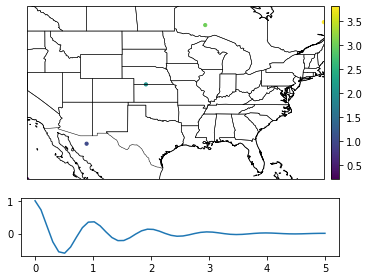

In [35]:
#Figure
fig=plt.figure(figsize=(12, 7))
# 第一个坐标轴，绘制地图
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent(extent)
states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
ax1.add_feature(states, linewidth=.5, edgecolor="black")
ax1.coastlines('50m', linewidth=0.8)
# auto projection
pcm=ax1.scatter(lon, lat, c=temp, s=10, cmap='viridis',vmin=vmin, vmax=vmax)
fig.colorbar(pcm,ax=ax1, pad=0.01) # pad可以调整colorbar和图之间的距离

ax2 = plt.subplot(2, 1, 2)
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
ax2.plot(x1,y1)

# 调整位置
# 可以直接调整
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.3, pos1.y0+0.26,  pos1.width / 2.1, pos1.height / 3.0] 
ax2.set_position(pos2) # set a new position
# 也可以用一些小技巧
# pos1 = ax1.get_position() # get the original position 
# pos2 = ax2.get_position() # get the original position 
# adjust_y = 0.03
# pos2_ = [pos1.x0, pos1.y0 - pos2.height / height_ratio - adjust_y,  pos1.width, pos2.height / height_ratio] 
# ax2.set_position(pos2_) # set a new position
# ax2.set(title="a test boxplot")

最后是使用GridSpec的例子，使用GridSpec会相对更灵活一些，比如可以配置新的coloarbar，因为使用了add_axes，所以这种方式在使用subplot时不能实现。

[Text(0.5, 1.0, 'a test boxplot')]

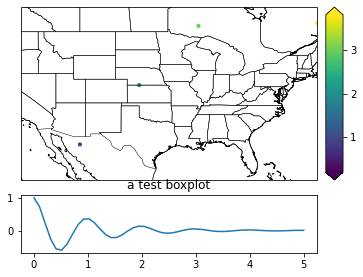

In [36]:
#Figure
fig = plt.figure(figsize=(12, 7))
grid = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(grid[0], projection=ccrs.PlateCarree())
ax1.set_extent(extent)
states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
ax1.add_feature(states, linewidth=.5, edgecolor="black")
ax1.coastlines('50m', linewidth=0.8)
# auto projection
pcm=ax1.scatter(lon, lat, c=temp, s=10, cmap='viridis',vmin=vmin, vmax=vmax)
# fig.colorbar(pcm,ax=ax1)
#colorbar
# get size and extent of axes:
axpos = ax1.get_position()
pos_x = axpos.x0 + axpos.width + 0.01  # + 0.25*axpos.width
pos_y = axpos.y0
cax_width = 0.02
cax_height = axpos.height
# create new axes where the colorbar should go.
# it should be next to the original axes and have the same height!
pos_cax = fig.add_axes([pos_x, pos_y, cax_width, cax_height])
cbar=fig.colorbar(pcm,cax=pos_cax, extend='both', orientation='vertical')

ax2 = plt.subplot(grid[1])
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
ax2.plot(x1,y1)

# 调整位置
pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position() # get the original position 
height_ratio = 3
adjust_y = 0.03
pos2_ = [pos1.x0, pos1.y0 - pos2.height / height_ratio - adjust_y,  pos1.width, pos2.height / height_ratio] 
ax2.set_position(pos2_) # set a new position
ax2.set(title="a test boxplot")

接下来再补充一个用seaborn画第二个图的例子。

In [37]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


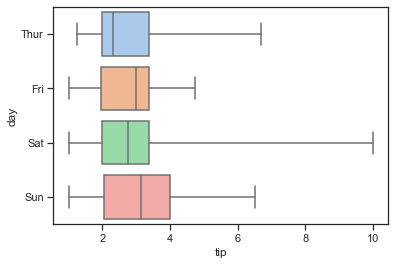

In [38]:
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)

[Text(0.5, 1.0, 'a test boxplot')]

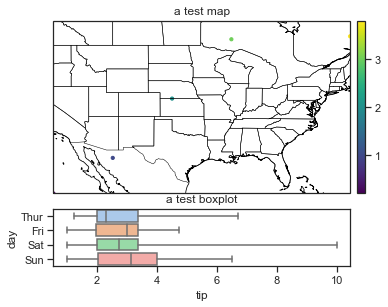

In [39]:
#Figure
fig=plt.figure(figsize=(12, 7))
# 第一个坐标轴，绘制地图
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent(extent)
ax1.set(title="a test map")
states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
ax1.add_feature(states, linewidth=.5, edgecolor="black")
ax1.coastlines('50m', linewidth=0.8)
# auto projection
pcm=ax1.scatter(lon, lat, c=temp, s=10, cmap='viridis',vmin=vmin, vmax=vmax)
fig.colorbar(pcm,ax=ax1, pad=0.01) # pad可以调整colorbar和图之间的距离

ax2 = plt.subplot(2, 1, 2)
sns.boxplot(ax=ax2,x="tip", y="day", data=tips, whis=np.inf)

# 调整位置
pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position() # get the original position 
height_ratio = 3
adjust_y = 0.03
pos2_ = [pos1.x0, pos1.y0 - pos2.height / height_ratio - adjust_y,  pos1.width, pos2.height / height_ratio] 
ax2.set_position(pos2_) # set a new position
ax2.set(title="a test boxplot")

### 中国地图

因为很多在线版本的地图是国外开源的，我国领土边界标记不正确，所以需要手动导入正确的shapefile，这里我们以流域的shapefile为例，来看看怎么在cartopy中导入外部的shapefile。

In [40]:
import geopandas as gpd
import numpy as np
# https://www.cnblogs.com/wodewei/p/14462258.html
sites = gpd.read_file('shpfile/chosen_stations.shp', encoding='gbk')
stid = sites.StationNam
lat = sites.Latitude
lon = sites.Longitude

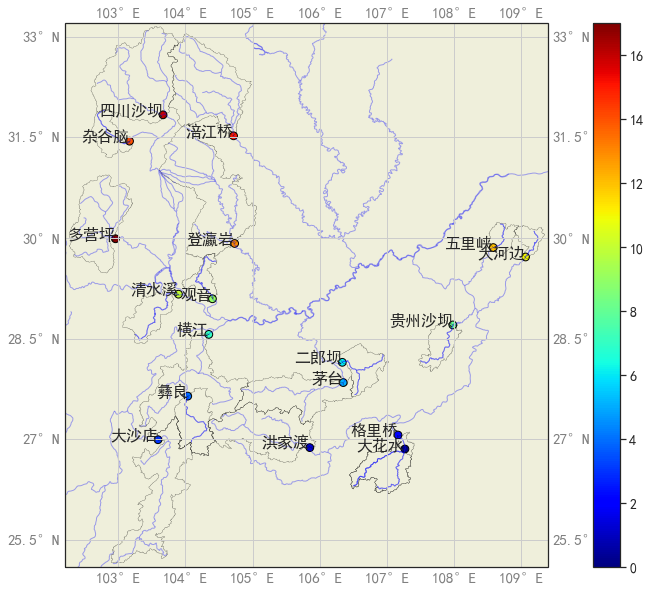

In [41]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.feature import ShapelyFeature
from matplotlib import pyplot as plt

# http://c.biancheng.net/matplotlib/9284.html
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# for Ubuntu this is a quick method to fix the problem: https://github.com/Clarmy/mplfonts
# You can also download font from here: https://github.com/tracyone/program_font
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": proj})
# Show a region
# ax.set_extent([-23, 55, -35, 40])
ax.set_extent([102.2, 109.4, 25.1, 33.2])

ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')

ax.add_feature(cf.COASTLINE, lw=2)
gl = ax.gridlines(draw_labels=True)
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
# Make figure larger
plt.gcf().set_size_inches((16, 10))

import cartopy.io.shapereader as shpreader
# Read shape file
reader = shpreader.Reader("shpfile/river_in_sanxia_chosen.shp")
geo_records = [tmp for tmp in reader.records()]
for i in range(len(geo_records)):
    geometry = geo_records[i].geometry
#     print(type(geometry))
# refer to: https://scitools.org.uk/cartopy/docs/v0.15/examples/hurricane_katrina.html
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='none', edgecolor="blue",alpha=0.35)
    
reader_p = shpreader.Reader("shpfile/YangtzeRiverBasins.shp")
geo_p_records = [tmp for tmp in reader_p.records()]
for i in range(len(geo_p_records)):
    geometry = geo_p_records[i].geometry
#     print(type(geometry))
# refer to: https://techoverflow.net/2021/04/25/how-to-plot-shapefile-data-in-cartopy/
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='none', edgecolor="black",alpha=0.75,lw=0.2)
    
# refer to: http://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week4/02_Cartopy_PlotPoints.html
scat = ax.scatter(lon,lat, s=60,c=np.arange(18),cmap="jet", edgecolor='black',alpha=1, transform=proj)
cbar = fig.colorbar(scat, orientation="vertical")
# cbar = fig.colorbar(scat, ax=ax, pad=0.03)
cbar.ax.tick_params(labelsize=14)
for count, site in enumerate(stid):
    ax.text(lon[count],lat[count],site,horizontalalignment='right',transform=proj,fontsize=16) 